<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-чтение-файлов" data-toc-modified-id="Импорт-библиотек-и-чтение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и чтение файлов</a></span></li><li><span><a href="#Изучение-датасетов-и-подготовка-данных" data-toc-modified-id="Изучение-датасетов-и-подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение датасетов и подготовка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Фреймворк-ICE" data-toc-modified-id="Фреймворк-ICE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Фреймворк ICE</a></span></li><li><span><a href="#Фреймворк-RICE" data-toc-modified-id="Фреймворк-RICE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Фреймворк RICE</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-визуализации-анализа" data-toc-modified-id="Подготовка-данных-для-визуализации-анализа-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных для визуализации анализа</a></span></li><li><span><a href="#Визуализация-и-анализ-кумулятивных-метрик" data-toc-modified-id="Визуализация-и-анализ-кумулятивных-метрик-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Визуализация и анализ кумулятивных метрик</a></span></li><li><span><a href="#Изучение-аномалий" data-toc-modified-id="Изучение-аномалий-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучение аномалий</a></span></li><li><span><a href="#Расчет-статистической-значимости" data-toc-modified-id="Расчет-статистической-значимости-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчет статистической значимости</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Знакомство с данными

### Импорт библиотек и чтение файлов

Импортируем библиотеки необходимые для нашей работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mth
import numpy as np
import scipy.stats as stats
import datetime as dt

Запишем локальный путь к файлу с данными в переменную path.

In [2]:
path = '/Users/segagoose/Documents/YandexPracticum/принятие решений в бизнесе/project'

Прочитаем полученные датасеты и запишем их в переменные `hypothesis`, `orders` и `visitors`.

In [3]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    
    orders = pd.read_csv('/datasets/orders.csv')
    
    visitors = pd.read_csv('/datasets/visitors.csv')
    
except:
    hypothesis = pd.read_csv(path + '/hypothesis.csv')
    
    orders = pd.read_csv(path + '/orders.csv')
    
    visitors = pd.read_csv(path + '/visitors.csv')

### Изучение датасетов и подготовка данных

Выведем на экран первые 10 строк каждого датасета и ознакомимся с ними.

In [4]:
for table in [hypothesis, orders, visitors]:
    display(table.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Прочитаем гипотезы:

In [5]:
for string in hypothesis['Hypothesis']:
    print(string)

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Запустить собственную службу доставки, что сократит срок доставки заказов
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Запустить акцию, дающую скидку на товар в день рождения


Приведем названия столбцов к единому стандарту.

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

Изучим таблицы на наличие пропусков и какие типы данных заданы в столбцах.

In [7]:
for table in [hypothesis, orders, visitors]:
    table.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 column

Пропущенные значения отсутствуют, а вот в столюцах `date` необходимо преобразовать тип данных в date.

In [8]:
for table in [orders, visitors]:
    table['date'] = table['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим данные на наличие дубликатов.

In [9]:
display(orders['group'].value_counts())
display(visitors['group'].value_counts())

orders[orders.duplicated() == True]

B    640
A    557
Name: group, dtype: int64

A    31
B    31
Name: group, dtype: int64

,transaction_id,visitor_id,date,revenue,group


Дубликаты отсутствуют.

Также необходимо изучить, нет ли пользователей в датасете `orders`, которые попали в обе группы тестирования.

In [10]:
wrong_users = orders[orders['group'] == 'A']['visitor_id'].isin(orders[orders['group'] == 'B']['visitor_id'])

In [11]:
wrong_users.head()

2      True
7     False
8     False
10    False
12    False
Name: visitor_id, dtype: bool

Такие пользователи имеются, для того чтобы рещультат анализа теста был корректный, удалим данных пользователей из датасета.

In [12]:
data_wrong_users = orders[orders['group'] == 'A'][wrong_users]['visitor_id'].unique()

Выведем на экран список id таких пользователей и их количество. 

In [13]:
print('Список id пользователей попавших в обе группы:') 
print(data_wrong_users)

print('Количество пользователей попавших в обе группы:', len(data_wrong_users))

Список id пользователей попавших в обе группы:
[4069496402  199603092 3803269165 2378935119  237748145 4256040402
 2038680547 1738359350 2458001652 3891541246 2716752286 3656415546
 2686716486 2954449915 2927087541 3234906277  457167155 2579882178
 3957174400 1648269707 2780786433  818047933 2044997962 1959144690
 3202540741 1333886533  351125977 3951559397  393266494 3984495233
 4120364173 4266935830 1230306981 1294878855 1614305549    8300375
  477780734 1668030113 3717692402 3766097110 3941795274  471551937
 1316129916 1801183820 1602967004 2587333274 2600415354  232979603
 3972127743 1404934699  276558944 3062433592 2654030115 3963646447
 4186807279 2712142231 2949041841  963407295]
Количество пользователей попавших в обе группы: 58


Отфильруем таблицу `orders`, удалив из нее информацию о сделках "задвоенных" пользователей.

In [14]:
orders = orders[np.logical_not(orders['visitor_id'].isin(data_wrong_users))].reset_index(drop=True)

Выведем результат на экран.

In [15]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,16490,B
1012,2662137336,3733762160,2019-08-14,6490,B
1013,2203539145,370388673,2019-08-14,3190,A
1014,1807773912,573423106,2019-08-14,10550,A


Мы удалили 181 строку с данными по заказам "задвоенных" пользователей, это достаточно большой пласт информации, 15% от начального датафрейма, однако теперь мы можем быть уверены в правильности будущих результатов анализа А/В теста.

### Вывод

Мы прочитали полученные датасеты и записали их в переменные `hypothesis`, `orders` и `visitors`.<br>
Датафрейм `hypothesis` содержит информацию о выдвинутых гипотезах, а также об оценке этих гипотез по 10-ти бальной шкале по методу RICE. Информация содержится в 5 столбцах и 9 строках. В данных отсутвуют пропуски и дубликаты, названия столбцов мы привели к нижнему регистру.<br>
Датафрейм `orders` одержит информацию о заказах. Информация содержится в 5 столбцах и 1197 строках. В данных отсутвуют пропуски и полные дубликаты, однако есть пользователи, которые попали в обе группы, мы удалили 181 строку с данными по заказам "задвоенных" пользователей, это достаточно большой пласт информации, 15% от начального датафрейма, однако теперь мы можем быть уверены в правильности будущих результатов анализа А/В теста. Также названия столбцов мы привели к принятым стандартам, а данные из колонки **date** преобразовали в тип date.<br>
Датафрейм `visitors` одержит информацию о количестве посетителей интернет-магазина на определенную дату. Информация содержится в 3 столбцах и 62 строках. В данных отсутвуют пропуски и дубликаты. Данные из колонки **date** преобразовали в тип date.<br><br>

Данные готовы к анализу.

## Приоритизация гипотез

### Фреймворк ICE

Чтобы приоритизировать полученные гипотезы воспользумся фреймворком ICE.<br>

Формула для расчета: $ICE = \frac{Impact * Confidence}{Efforts}$<br>

Полученные результаты запишем в столбец `ice`.

In [16]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)

Отсортируем гипотезы по убыванию по данным столбца `ice`.

In [17]:
hypothesis = hypothesis.sort_values(by='ice', ascending=False)

Выведем результат на экран.

In [18]:
pd.set_option("max_colwidth", None)

(
    hypothesis.style
    .highlight_max(color='yellowgreen', subset=['ice'])
    .highlight_min(color='coral', subset=['ice'])
)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Гипотезы 8, 0 и 7 занимают первые три места по перспективности реализации, посмотрим, что изменится при использовании фреймворка RICE

### Фреймворк RICE

Приоритизируем гипотезы с помощью фреймворка RICE.<br>

Формула для расчета: $RICE = \frac{Rearch * Impact * Confidence}{Efforts}$

In [19]:
hypothesis['rice'] = (
    hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
).round(2)

Отсортируем гипотезы по убыванию по данным столбца `ice`.

In [20]:
hypothesis = hypothesis.sort_values(by='rice', ascending=False)

Выведем на экран.

In [21]:
(
    hypothesis.style
    .highlight_max(color='yellowgreen', subset=['ice', 'rice'])
    .highlight_min(color='coral', subset=['ice', 'rice'])
)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.330000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.120000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.330000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000


С учетом охвата пользователей изменился наш топ перспективности гипотез, теперь первое место занимает гипотеза с индексом 7, второе - шипотеза с индексом 2 и третье - гипотеза с индексом 0.

### Вывод

В этой главе мы приоритизировали гипотезы. Сперва с помощью фреймворка ICE, изучив параметры гипотез impact, confidence и efforts, мы получили гипотезы с индексами 8, 0 и 7, как самые перспективные для реализации гипотезы. Но фреймворк ICE не учитывает охват пользоватлей (reach) изучаемых гипотез, чтобы проанализировать гипотезы с учетом охвата, мы применили фреймворк RICE и это изменило наш вывод о том, какие гипотезы наиболее перспективны. Ими стали гипотезы с индексами 7,2 и 0.

## Анализ A/B-теста

### Подготовка данных для визуализации анализа

Построим таблицу с уникальными парами значений дат и групп теста.

In [22]:
dates_groups = orders[['date','group']].drop_duplicates()

Создадим переменную `orders_aggregated`, в которой соберем агрегированные кумулятивные по дням данные о заказах.

In [23]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], 
        orders['group'] == x['group']
    )].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visitor_id' : 'nunique', 
            'transaction_id' : 'nunique', 
            'revenue' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])

Создадим переменную `visitors_aggregated`, в которой соберем агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [24]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group']
    )].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visitors' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])

Объединяем данные из `orders_aggregated` и `visitors_aggregated`.

In [25]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

И переименуем столбцы.

In [26]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Выведем результат на экран.

In [27]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,19,23,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,36,42,234381,1338
3,2019-08-02,B,39,40,221801,1294
4,2019-08-03,A,60,66,346854,1845


Отлично! Данные подготовлены, можно переходить к визуализации.

### Визуализация и анализ кумулятивных метрик

В переменной `cumulative_revenu_a` соберем количество заказов и кумулятивную выручку по дням в группе А.

In [28]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

Аналогично по группе B.

In [29]:
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

Построим графики кумулятивной выручки.

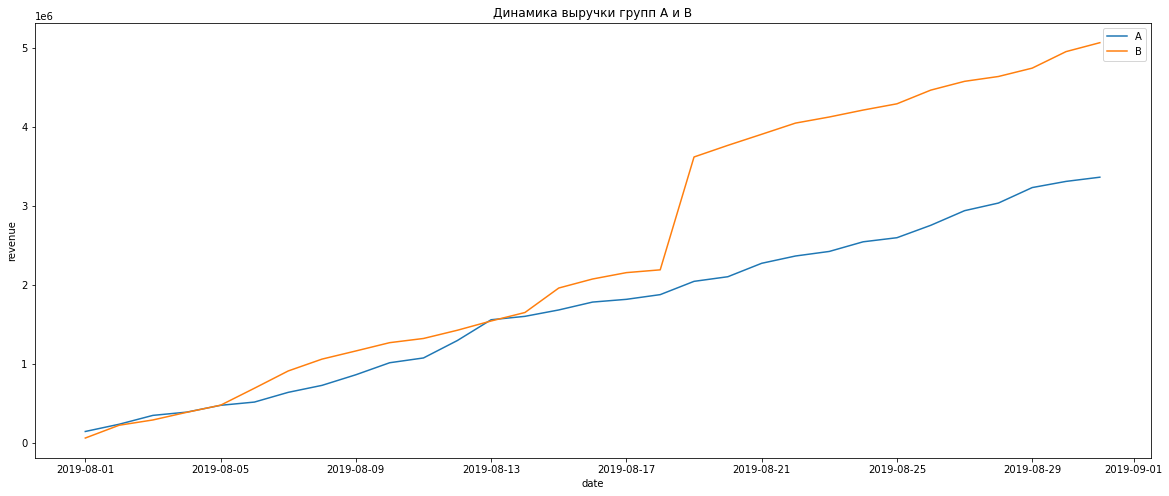

In [30]:
plt.figure(figsize=(20, 8))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.ylabel('revenue')
plt.xlabel('date')
plt.title('Динамика выручки групп А и В')
plt.legend()
plt.show()

Выручка планомерно растет в течение теста, группа В показывает более высокий результат за весь изучаемый период. При этом после 17-08-2019 мы видим резкий скачок выручки группы В, это возможно с появлением аномально больших заказов.

Построим графики по среднему чеку групп А и В.

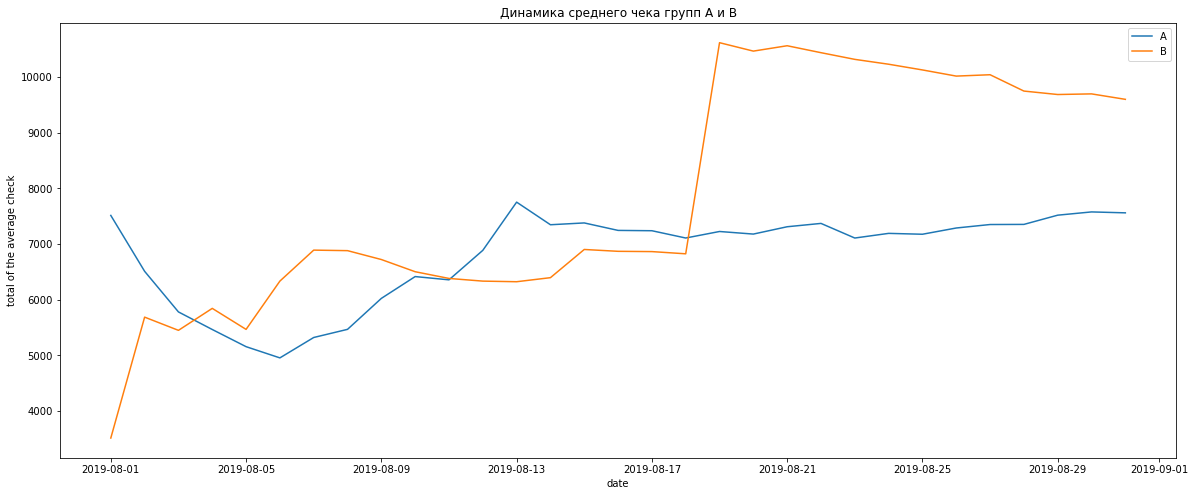

In [31]:
plt.figure(figsize=(20, 8))
plt.plot(
    cumulative_revenue_a['date'], 
    cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], 
    label='A'
)

plt.plot(
    cumulative_revenue_b['date'], 
    cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], 
    label='B'
)

plt.ylabel('total of the average check')
plt.xlabel('date')
plt.title('Динамика среднего чека групп А и В')
plt.legend()
plt.show()

Средний чек имеет сильную волотильность в начале теста, поочередно меняясь местами группы А и В. Мы видим подтверждение наших выводов по графику динамики выручки, что в группе В был аномально большой заказ после 17-08-2019, что привело к резкому росту кумулятивного среднего чека и до конца тестирования графики больше не пересекались. Также мы видим, что к концу тестирования график среднего чека стабилизируется и становится более равномерным, по группе В видна тенденция к снижению среднего чека, а по группе А наоборот к росту.

Построим график относительного различия для среднего чека, для этого объеденим данные кумулятивной выручки групп А и В.

In [32]:
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    on='date',
    how='left', 
    suffixes=['A', 'B']
)

Выведем график.

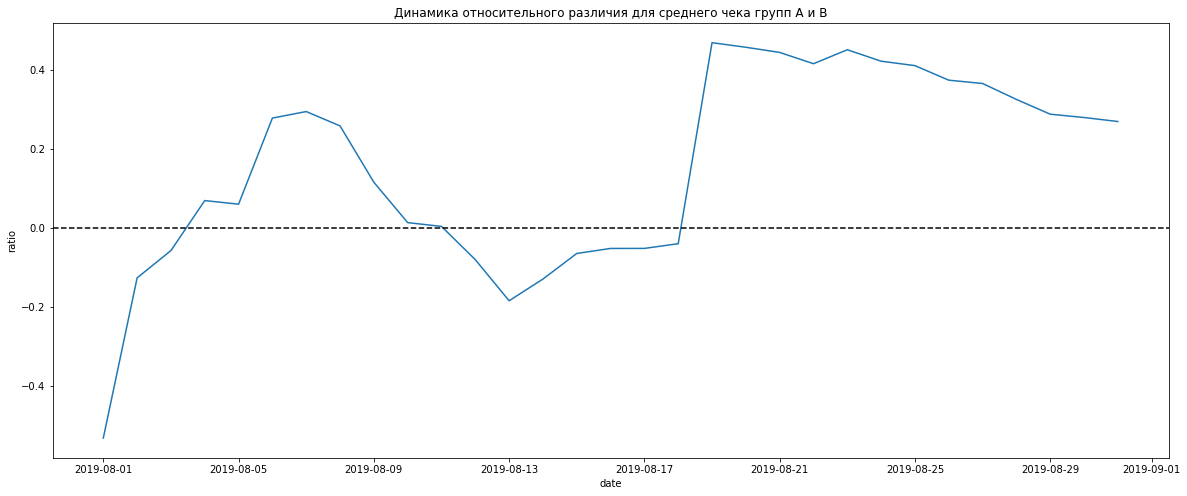

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(
    merged_cumulative_revenue['date'], 
    (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('ratio')
plt.xlabel('date')
plt.title('Динамика относительного различия для среднего чека групп А и В')
plt.show()

Наблюдаются значительные изменения графика в нескольких датах, скорее всего там и хранятся аномальные заказы.

Для анализа кумулятивной конверсии подготовим данные.

Расчитаем конверсию.

In [34]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

Создадим переменную `cumulative_data_a`, куда схораним данные только по группе А.

In [35]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

И повторим действие для группы В.

In [36]:
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

Построим графики.

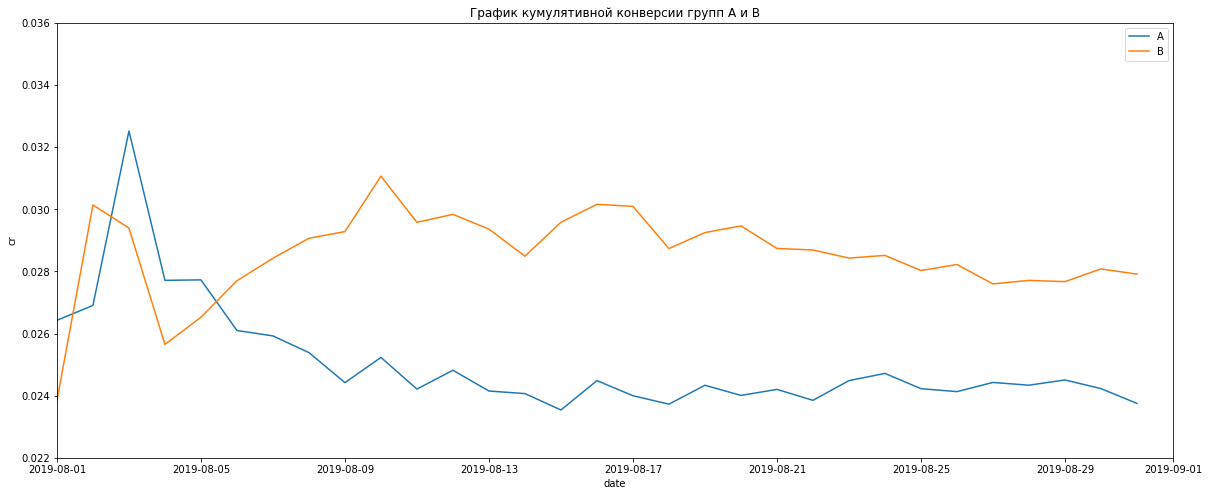

In [37]:
plt.figure(figsize=(20, 8))

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.legend()
plt.ylabel('cr')
plt.xlabel('date')
plt.title('График кумулятивной конверсии групп А и В')
plt.axis([dt.date(2019,8,1), dt.date(2019,9,1), 0.022, 0.036]) 
plt.show()

Практически с самого начала тестирования графики разделились, конверсия у группы В выше группы А, в среднем на 0.004. Конверсия группы А имеет тенденцию к снижению.

Для изучения графика относительного различия кумулятивных конверсий, объеденим данные по группам А и В.

In [38]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], 
    on='date', 
    how='left', 
    suffixes=['A', 'B']
)

Построим график.

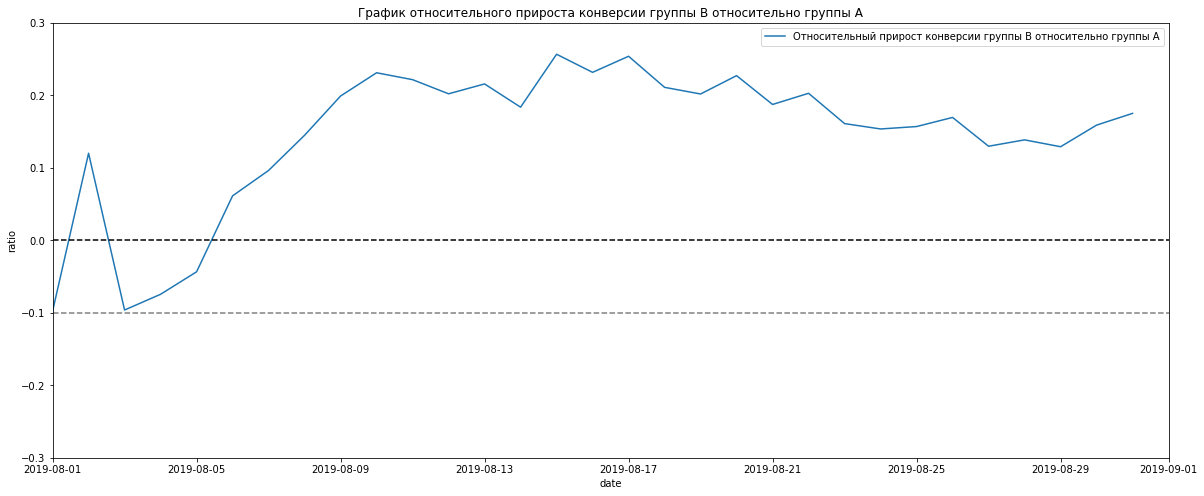

In [39]:
plt.figure(figsize=(20, 8))

plt.plot(
    merged_cumulative_conversions['date'], 
    merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)

plt.legend()
plt.ylabel('ratio')
plt.xlabel('date')
plt.title('График относительного прироста конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.date(2019,8,1), dt.date(2019,9,1), -0.3, 0.3])
plt.show()

В начале теста конверсия группы В имела небольшую просадку относительно группы А, но затем вырвалась вверх. Имеет тенденцию к увеличению роста конверсии относитльно группы А.

Для формирования окончательных выводов требуется проанализировать аномалии, возможно, они изменят наши суждения.

### Изучение аномалий

Изучим наши данные на аномалии, которые могут искажать результаты A/B-теста. 

Соберем информацию количества заказов по пользователям.

In [40]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

Переименуем названия столбцов.

In [41]:
orders_by_users.columns = ['visitor_id', 'orders']

In [42]:
orders_by_users

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


Построим точечный график.

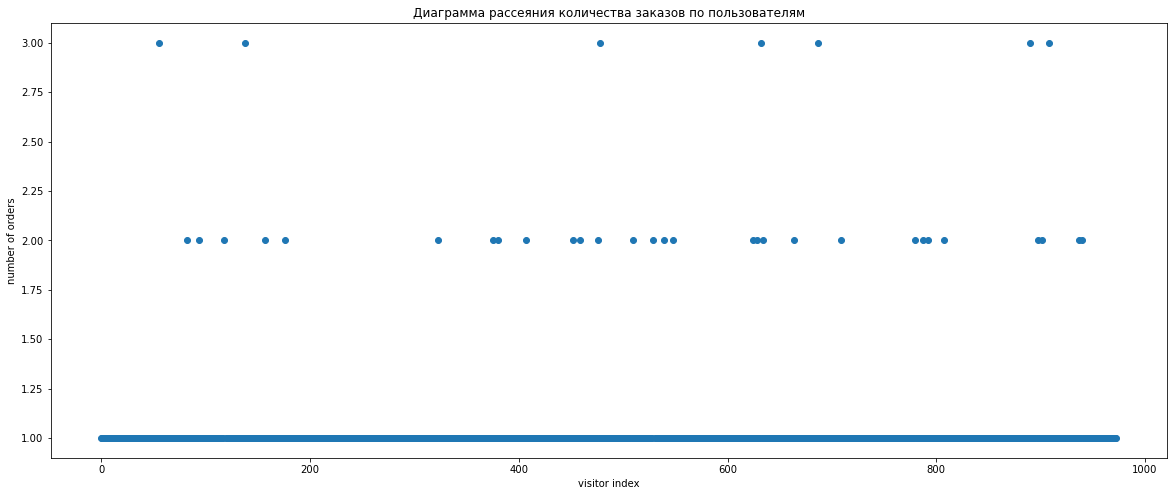

In [43]:
plt.figure(figsize=(20, 8))

x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])

plt.ylabel('number of orders')
plt.xlabel('visitor index')
plt.title('Диаграмма рассеяния количества заказов по пользователям')
plt.show()

Большинство пользователей делают не больше одного заказа, но не малое количество пользователей делают и два заказа. Остальные скорее всего будут выбросы. Для того чтобы убедиться в этом посмторим, какое количество заказов делают пользоваттели от 1 до 5 процентов крайних значений.

Посчитаем процентили количества заказов.

In [44]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли свыше 1 заказов, в свыше 2 заказов не более 1%. Логично будет удалить пользователей с заказами количество которых составляет более двух.

Изучим стоимости заказов, для этого построим диаграмму рассеяния.

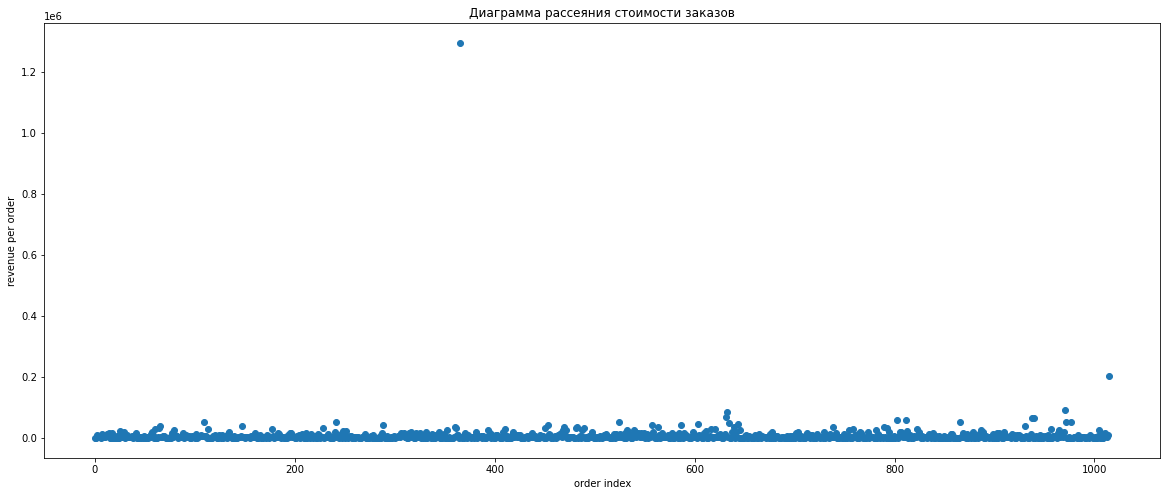

In [45]:
plt.figure(figsize=(20, 8))

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.ylabel('revenue per order')
plt.xlabel('order index')
plt.title('Диаграмма рассеяния стоимости заказов')
plt.show()

На графике видны явные выбросы которые точно повлияют на результаты теста, из-за заказа стоимостью более 1.2 млн. у.е., мы не можем по графику определить какая сумма заказа является нормой. Для выявления выбросов определим процентили. 

In [46]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов превышают 26 785 у.е. и не более 1% превышают 53 904 у.е., будем считать, что граница "нормальных" заказов заканчивается на стоимости до 50 000 у.е.

### Расчет статистической значимости

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 
Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.
Для этого начнем с подготовки данных.

Соберем данные по кумулятивному количеству посетителей из группы А на каждый день.

In [47]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)

visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

Повторим действия для группы В.

In [48]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

Теперь соберем данные по кумулятивной выручке на каждый день по группе А.

In [49]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

И повторим для группы В.

In [50]:
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

Соберем полученные данные и запишем в переменную `data`.

In [51]:
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

Выведем результат на экран.

In [52]:
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Также для расчета статистической значимости различия в конверсии между группами, потребуется создать переменные с данными пользователей, которые заказывали хотя бы 1 раз и количеством их заказов.

Для групппы А.

In [53]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

И для группы В.

In [54]:
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 

Объявим переменные sample_a и sample_b, в которых пользователям будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [55]:
#Группа А
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), 
            name='orders'
        )
    ],axis=0
)

#Группа В
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],pd.Series(
            0, 
            index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), 
            name='orders'
        )
    ],axis=0
) 

Применим U критерий Манна-Уитни.

In [56]:
'{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b, alternative="two-sided")[1])

'0.011'

Расчитаем относительный прирост конверсии группы B.

In [57]:
'{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1)

'0.160'

P-value равен 0.011 - это ниже порогового значения 0.05, а значит мы опровергаем нулевую гипотезу о том, что различий в конверсии между группами нет. Также это подтверждает относительный прирост конверсии группы В на 16% 

Теперь проверим статистическую значимость различий в среднем чеке между группами по "сырым" данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

Применим U критерий Манна-Уитни.

In [58]:
'{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'],
    alternative="two-sided"
)[1])

'0.829'

А также найдём относительные различия в среднем чеке между группами.

In [59]:
'{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
) 

'0.287'

P-value равен 0.829, что сильно выше порогового значения 0.05, а значит нет причин отвергать нулевую гипотезу о том, что различий в среднем чеке между группами нет. Однако средний чек группы В выше чека группы А на 28.7%.<br> На эти показатели влияют ранее найденые аномалии. При анализе выбросов мы приняли решение, что будем считать границу "нормальных" заказов заканчивающуюся на стоимости до 50 000 у.е., а также считать аномальными значениями пользователей совершивших больше двух заказов.

Для очищения данных от выбросов, сохраним id посетителей, которые совершили более 2 заказов, а также тех чьи заказы превышали 50 000 у.е.

In [60]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > 50000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Выведем результат на экран.

In [61]:
abnormal_users.head()

937    148427295
33     249864742
58     611059232
972    759473111
811    887908475
Name: visitor_id, dtype: int64

Посчитаем количество таких пользователей.

In [62]:
len(abnormal_users)

22

Всего 22 аномальных пользователя. По собранным пользователям отфильтруем данные для расчета статистической значимости.

In [63]:
#Группа А
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#Группа В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим U критерий Манна-Уитни к очищенным данным.

In [64]:
'{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered, alternative="two-sided")[1])

'0.006'

Также по очищенным данным расчитаем относительный прирост конверсии группы B.

In [65]:
'{0:.3f}'.format(sample_a_filtered.mean()/sample_b_filtered.mean()-1)

'-0.165'

P-value практически не изменился и немного снизился до 0.006. А вот отностительный прирост после удаления аномальных значений уменьшился в два раза, теперь он отрицательный, а значит пользователи группы А конвертируются лучше. Нулевую гипотезу о равенстве отвергаем, также как и в случае с сырыми данными.

Теперь изучим как очищение данных повлияло на статистическую значимость среднего чека.

Применим U критерий Манна-Уитни.

In [66]:
'{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            alternative="two-sided"
        )[1]
)

'0.939'

И расчитаем относительный прирост.

In [67]:
'{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
)

'0.011'

После очищения данных, результаты теста значительно изменились. P-value вырос еще больше, значит нулевую гипотезу не отвергаем, а результат расчета относительного прироста сильно приюлизился к группе А.

### Вывод

Проведенный анализ показал, что:

- Статистическая значимость равенста конверсий групп А и В крайне низка, мы не можем утверждать, что они равны, ни по "сырым" данным, ни по отфильтрованным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- По относительным показателям отфильтрованных данных конверсия группы В ниже, чем у группы А, а по среднему чеку показатели практически сравнялись, превосходство группы В на 1.1%;
- В связи с тем, что относительные показатели не высокие, а p-value по "сырым" и отфильрованным данным показывает тот же результат, мы принимаем решение о прекращении теста, вероятность, что результаты группы В будут сильно выше группы А, крайне низка.

## Общий вывод

Цель данного проекта состояла в приоритизации гипотез и анализе А/В теста.
Мы прочитали полученные датасеты с информацией о выдвинутых гипотезах и данных о проведенном А/В тесте, и записали их в переменные `hypothesis`, `orders` и `visitors`.<br>
Изучили полученную информацию:
- Датафрейм `hypothesis` содержит информацию о выдвинутых гипотезах, а также об оценке этих гипотез по 10-ти бальной шкале по методу RICE. Информация содержится в 5 столбцах и 9 строках. В данных отсутвуют пропуски и дубликаты, названия столбцов мы привели к нижнему регистру;<br>
- Датафрейм orders одержит информацию о заказах. Информация содержится в 5 столбцах и 1197 строках. В данных отсутвуют пропуски и полные дубликаты, однако есть пользователи, которые попали в обе группы, мы удалили 181 строку с данными по заказам "задвоенных" пользователей, это достаточно большой пласт информации, 15% от начального датафрейма, однако теперь мы можем быть уверены в правильности будущих результатов анализа А/В теста. Также названия столбцов мы привели к принятым стандартам, а данные из колонки date преобразовали в тип date;<br>
- Датафрейм `visitors` одержит информацию о количестве посетителей интернет-магазина на определенную дату. Информация содержится в 3 столбцах и 62 строках. В данных отсутвуют пропуски и дубликаты. Данные из колонки **date** преобразовали в тип date.<br><br>

Затем мы приоритизировали гипотезы. Сперва с помощью фреймворка ICE, изучив параметры гипотез impact, confidence и efforts, мы получили гипотезы с индексами 8, 0 и 7, как самые перспективные для реализации гипотезы. Но фреймворк ICE не учитывает охват пользоватлей (reach) изучаемых гипотез, чтобы проанализировать гипотезы с учетом охвата, мы применили фреймворк RICE и это изменило наш вывод о том, какие гипотезы наиболее перспективны. Ими стали гипотезы с индексами 7,2 и 0.
Суть этих гипотез:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.<br><br>

Провели несколько этапов анализа А/В теста:
- Обработали данные для анализа и визуализации;
- Построили и изучили графики кумулятивных выручки, среднего чека и конверсии по группам, что помогло выявить выбросы и аномалии в данных;
- Исследовали аномалии, расчитали процентили и определили, что не более 5% пользователей оформляли свыше 1 заказов, в свыше 2 заказов не более 1%. Логично будет удалить пользователей с заказами количество которых составляет более трех. А по стоимости не более 5% заказов превышают 26 785 у.е. и не более 1% превышают 53 904 у.е., будем считать, что граница "нормальных" заказов будет заканчиваться на стоимости до 50 000 у.е.;
- И наконец мы провели расчет статистической значимости по "сырым" и отфильтрованным данным. Проведенный анализ показал, что:
    1. Статистическая значимость равенста конверсий групп А и В крайне низка, мы не можем утверждать, что они равны, ни по "сырым" данным, ни по отфильтрованным;
    2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
    3. По относительным показателям отфильтрованных данных конверсия группы В ниже, чем у группы А, а по среднему чеку показатели практически сравнялись, превосходство группы В на 1.1%;
    4. В связи с тем, что относительные показатели не высокие, а p-value по "сырым" и отфильрованным данным показывает тот же результат, мы принимаем решение о прекращении теста, вероятность, что результаты группы В будут сильно выше группы А, крайне низка.